**Seasons Played vs Prize Money in Tennis**

**Introduction**

 In this report, we are working on the data of Top 500 tennis players worldwide. The players win Prize Money through tournaments (Hadlich 2020). We gathered our data from the webpage *Ultimate Tennis Statistics*. This webpage is the ultimate men's tennis statistics destination for the die-hard tennis fans. They provided information about latest or historical results, in-match statistics, records or all-time greats comparisons, and Elo ratings or tournament forecasts. In the data set *Player Stats for Top 500 Players*, we have lots of parameters including their physical information, game information and their social media contacts. Within these parameters, the focused data set contains player information on: Age of the players, Prize Money made, Countries of the players, Current rank of the players, Best rank of the players and the number of Seasons the players have participated. And specifically, our focused predictors are the Prize Money made and Seasons played.
 
For this project, we are trying to answer the question: Is Prize Money won by the player correlated to the Seasons played? How are they related?

Below is our redone exploratory analysis. We read in and clean our data. Splices of the unclean and final clean data are shown. Following cleaning our data, we use ggpairs to compare variables to see which ones have better relationships. We create a visual analysis of the top two variable pairs to see the relationships up close and then pick the graph with the stronger relationship to run our regression on. 

In [2]:
#load in libraries needed for project
library(tidyverse)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

**Methods**

In [3]:
#read in the tennis data from the web
tennis <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS") 
    
#show raw data
tennis_show_rawdata <- slice(tennis, 1:10)
tennis_show_rawdata


Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,25 (29-07-1994),Uzbekistan,Right-handed,Wikipedia,417 (81),253 (17-07-2017),Sanjar Fayziev,Two-handed,"$122,734",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Table 1. Raw data from the dataset

* In this data set there are 500 rows in total. As we can see there are a lot of NA's and the rows are cluttered with information we don't need.

In the next code cell we are removing excess data from the rows in the dataset.

In [4]:
#replaces the spaces in the column names with "."
names(tennis)<-make.names(names(tennis),unique = TRUE)

#Isolate the dollar amount from the Prize.Money column (US$ 18,879,855  24th all-time leader in earnings) -> (US$ 18,879,855)
tennis_fix_prize_money <- mutate(tennis, Prize.Money = str_extract(tennis$Prize.Money, "(\\$\\s?(\\d\\d?\\d?)(,\\d\\d\\d)*(\\.\\d\\d)?)"))

#Remove the currency and commas (US$ 18,879,855) -> 18870855 (numeric)
tennis_fix_prize_money <- mutate(tennis_fix_prize_money, Prize.Money = as.numeric((gsub("\\D+","", tennis_fix_prize_money$Prize.Money))))

#Remove the data from the Age column (26 (25-04-1993)) -> 26 (numeric)
tennis_clean_money <- mutate(tennis_fix_prize_money, Age = as.numeric((gsub("\\([^)]*\\)","", tennis_fix_prize_money$Age)))) 

#Remove numbers in brackets from Current Rank
tennis_clean_current_rank <-mutate(tennis_clean_money, Current.Rank = as.numeric ((gsub("\\([^)]*\\)","", tennis_clean_money$Current.Rank)))) 

#Remove numbers in brackets from Best Rank
tennis_fix_best_rank <- mutate(tennis_clean_current_rank, Best.Rank = as.numeric ((gsub("\\([^)]*\\)","", tennis_clean_current_rank$Current.Rank)))) 

#Remove columns like Facebook and Twitter and Nicknames as they can't be used to extrapolate data
#other columns being removed have too many NA rows in them
#this means we can't use those columns to make predictions as there was maybe ten - twenty data points in them
#X1 is being removed as it was there to show entry of data and how many rows there are in the data set in the original excel file
tennis_remove_rows <- tennis_fix_best_rank %>%
    select(-Favorite.Surface,
           -Turned.Pro,  
           -Last.Appearance, 
           -Best.Elo.Rank, 
           -Peak.Elo.Rating, 
           -Titles, 
           -GOAT.Rank, 
           -Best.Season, 
           -Masters, 
           -Birthplace, 
           -Residence, 
           -Weight, 
           -Coach, 
           -Facebook, 
           -Twitter, 
           -Nicknames, 
           -Grand.Slams, 
           -Davis.Cups, 
           -Web.Site, 
           -Team.Cups, 
           -Olympics, 
           -Weeks.at.No..1, 
           -Tour.Finals,
           -X1, 
           -Current.Elo.Rank, 
           -Backhand, 
           -Plays, 
           -Wikipedia, 
           -Name, 
           -Active, 
           -Height, 
           -Retired) 

#show columns remaining in clean data set
tennis_remove_row_show <- tennis_remove_rows %>%
    slice(1:10)
tennis_remove_row_show
    

Age,Country,Current.Rank,Best.Rank,Prize.Money,Seasons
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
26,Brazil,378,378,NA,NA
18,United Kingdom,326,326,59040,NA
32,Slovakia,178,178,3261567,14
21,"Korea, Republic of",236,236,374093,2
27,Australia,183,183,6091971,11
22,Poland,31,31,1517157,5
28,United States,307,307,278709,1
21,"Taiwan, Province of China",232,232,59123,1
25,Uzbekistan,417,417,122734,5


Table 2. Cleaned data from the dataset

In [5]:
#filter for prize money less than $5,000,000 to remove outliers imapcting relationships
#country isn't selected, because even though there is a lot of data points, we didn't have a use for it 
#remove NA's from data
tennis_clean <- tennis_remove_rows %>%
    na.omit() %>%
    filter(Prize.Money < 5000000) %>%
    select(Age, Current.Rank, Best.Rank, Prize.Money, Seasons)


#show clean data
tennis_clean_show <- tennis_clean %>%
    slice(1:10)
tennis_clean_show



Age,Current.Rank,Best.Rank,Prize.Money,Seasons
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,178,178,3261567,14
21,236,236,374093,2
22,31,31,1517157,5
28,307,307,278709,1
21,232,232,59123,1
25,417,417,122734,5
20,104,104,74927,3
19,22,22,1893476,3
28,148,148,303458,8


Table 3. Age, Current Rank, Best Rank, and Seasons of players who have earned less than $ 5,000,000 USD

In the next cell, the numerical columns are scaled.
The data is also split into training and testing data
We are testing to see which variables impact prize money so strata will be set to Prize.Money

In [6]:
set.seed(5)
#split data into testing and training
tennis_split <- initial_split(tennis_clean, prop = 0.75, strata = Prize.Money)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)

#scale data in recipe
tennis_recipe <- recipe(Prize.Money ~. , data = tennis_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

In the next cell we use ggpairs to explore the relationship between the columns we have in the clean data set. 

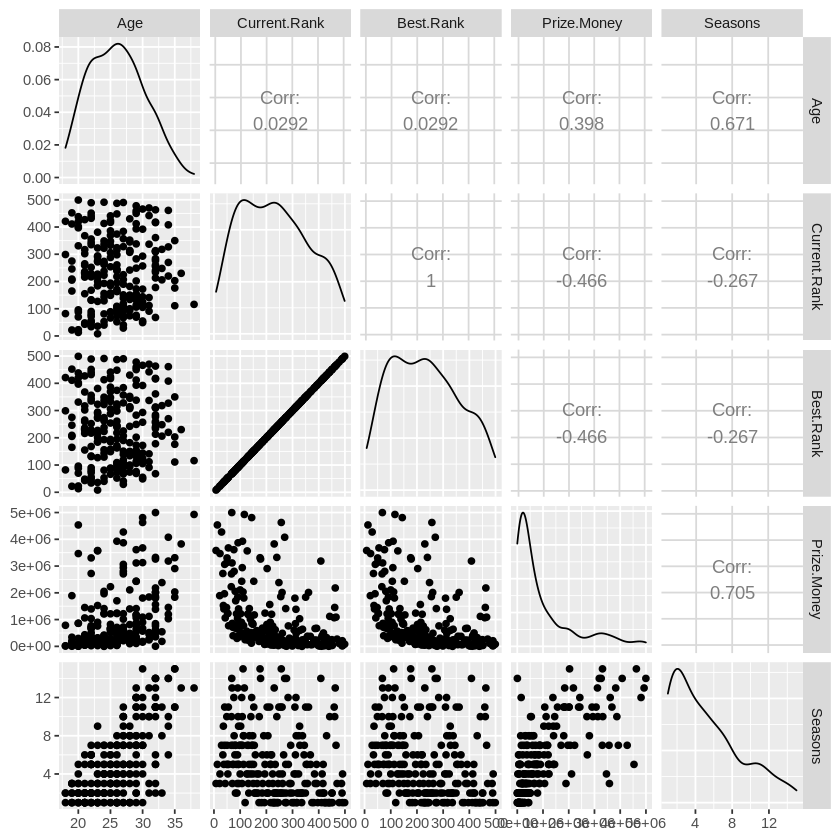

In [8]:
#explore training set variables using ggpairs
explore_dataset <- tennis_train %>%
ggpairs()
explore_dataset

Figure 1. GGPairs of the training data

From this ggpairs we see that Age and Seasons (0.671) and Prize Money and Seasons (0.705) have the strongest correlation values.
We explore these correlations in the next code cells by creating scatter plots to explore these relationships in depth.

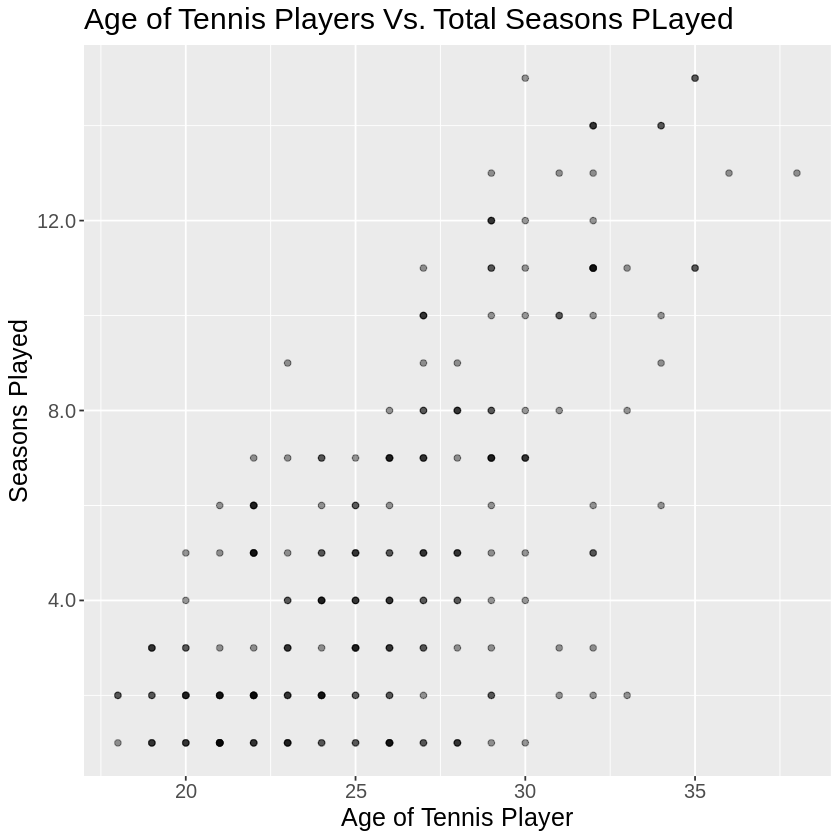

In [9]:
#graph comparing Age of tennis players and seasons played
tennis_explore_age_seasons <- ggplot(tennis_train, aes(x = Age, y = Seasons))+
geom_point(alpha = 0.4)+
labs(x = "Age of Tennis Player",
     y = "Seasons Played", 
     title = "Age of Tennis Players Vs. Total Seasons PLayed")+
scale_y_continuous(labels = scales::comma)+
theme(text = element_text(size=15))
tennis_explore_age_seasons

Figure 2. Age of Tennis Players vs Total Seasons Played

There is a weak positive relationship between the age of a tennis player and seasons played. 

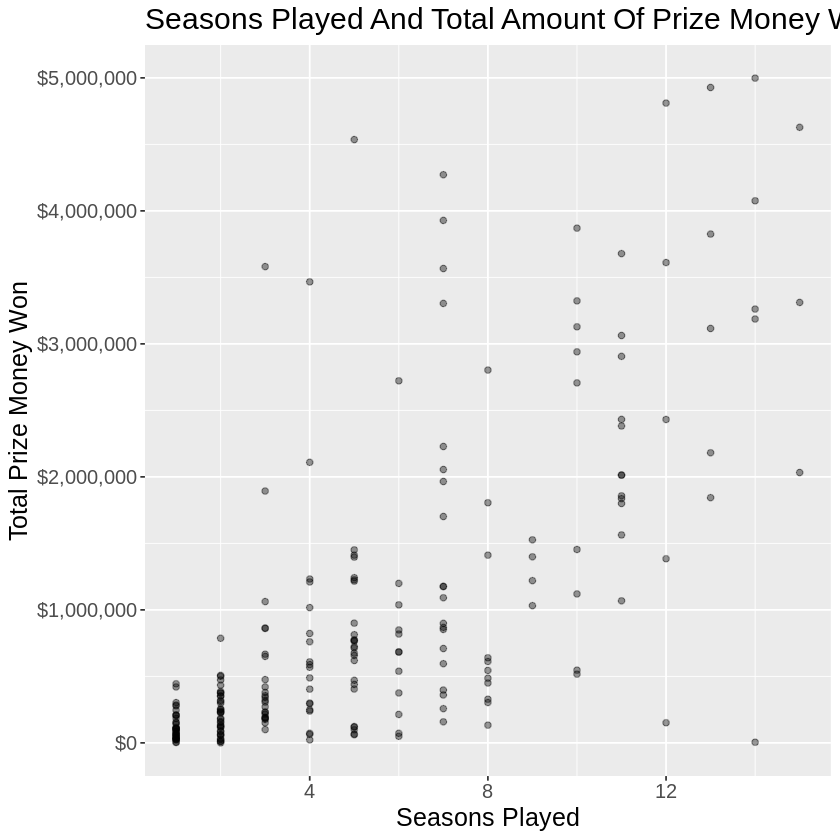

In [10]:
#explore Seasons played and Total Prize Money won
tennis_explore_prizemoney_seasons <- ggplot(tennis_train, aes(x = Seasons, y = Prize.Money))+
geom_point(alpha = 0.4)+
labs(x = "Seasons Played",
     y = "Total Prize Money Won", 
     title = "Seasons Played And Total Amount Of Prize Money Won")+
scale_y_continuous(labels = dollar_format())+
theme(text = element_text(size=15))
tennis_explore_prizemoney_seasons

Figure 3. Visualization of relationship between seasons played and total prize money won

There is a messy and weak positive relationship between Seasons Played and Prize Money won. 

We are going to run our regression on Seasons Played Vs Prize Money won as this data has a higher correlation value and although the data is messy due to outliers there is a definitive trend. With age and seasons played the trend isnt very clear in the beginning which would impact make our regression less accurate but with seasons played versus prize money won there is a noticeable positive trend throughout.

**Regression**

In [11]:
#setting seed as (5) for the regression
set.seed(5)

#making model for regression
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn")%>%
    set_mode("regression")

#creating fold
tennis_vfold <- vfold_cv(tennis_train, v = 5, strata = Prize.Money)

#creating recipe with Seasons as predictor variable
tennis_recipe1 <- recipe(Prize.Money ~ Seasons, data = tennis_train)

#creating wklfow for tune grid
tennis_wkflw <- workflow() %>%
    add_recipe(tennis_recipe1) %>%
    add_model(tennis_spec)


#creating gridvals
gridvals <- tibble(neighbors = seq(1:50))

#collecting results from fold
tennis_results_tune <- tennis_wkflw %>%
    tune_grid(resamples = tennis_vfold, grid = gridvals) %>%
    collect_metrics %>%
    filter(.metric == "rmse")

#selecting neighbor with the lowest mean value for regression
tennis_min <- tennis_results_tune %>%
    filter(mean == min(mean))


#creating visual plot for  neighbors vs mean rmse value
tennis_k_plot <- ggplot(tennis_results_tune, aes(x = neighbors, y = mean))+
    geom_point()+
    geom_line()+
    labs(x = "K", y = "RMSPE", title = "Neighbors vs RMSE value")


In [12]:
#selecting neighbor with the lowest mean value for regression
tennis_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
19,rmse,standard,848318.8,5,47302.76,Model19


Table 4. The neighbor with the lowest RMSE

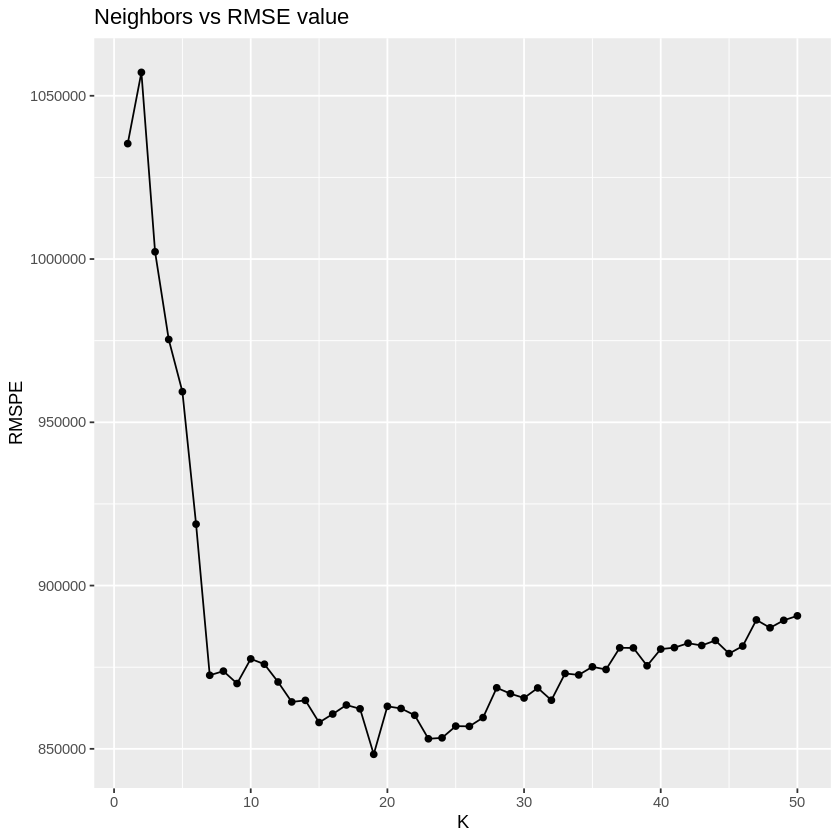

In [13]:
#creating visual plot for  neighbors vs mean rmse value
tennis_k_plot

Figure 4. Visualization of relationship between neighbors and RMSE value

In the cells above we set our model and recipe and put them into a workflow. By using tune grid we were able to pick a value for neighbors with the lowest mean ensuring the highest accuracy. We can see from our code and visual that the value 19 for neighbors is the value with the lowest mean. So in the next code cell we will use this to do our regression.

In [14]:
#creating model specification with selected k value from fold results
tennis_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) %>%
    set_engine("kknn")%>%
    set_mode("regression")

#creating workflow and fitting data
tennis_wkflw1 <- workflow() %>%
    add_recipe(tennis_recipe1) %>%
    add_model(tennis_spec1) %>%
    fit(data = tennis_train)

#collecting results from prediction on testing data
tennis_summary <- tennis_wkflw1 %>%
    predict(tennis_test) %>%
    bind_cols(tennis_test) %>%
    metrics(truth = Prize.Money, estimate = .pred) %>%
    filter(.metric == "rmse")
    
tennis_summary
                                

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,827594.6


Table 5. RMPSE of the testing data

Here are the results from our prediction on the testing data. Our estimate for avg prize money won is $827,594 (USD)  

This is a good value considering that to ensure our data wasn't influenced by extreme outliers we capped the prize money at $5,000,000 (USD)

In [15]:
#create a tibble to make predictions from 
tennis_preds <- tibble(Seasons = seq(from = 0, to = 20, by = 1))

#make predictions from tibble
tennis_preds <- tennis_wkflw1 %>%
    predict(tennis_preds) %>%
    bind_cols(tennis_preds) 
    
#make visualization of prediction
final_plot <- ggplot(tennis_train, aes( x = Seasons, y = Prize.Money))+
    geom_point() +
    geom_line(data = tennis_preds,
             mapping = aes(x = Seasons, y = .pred),
              colour = "blue") +
labs(x = "Seasons Played", y = "Prize Money won", title = "Seasons Played vs Prize Money Won Predicted")+
scale_y_continuous(labels = dollar_format())



#show players with more than 14 seasons played
tennis_show_highest_season <- tennis_train %>%
    filter(Seasons > 14)


In [16]:
#show players with more than 14 seasons played
tennis_show_highest_season

Age,Current.Rank,Best.Rank,Prize.Money,Seasons
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30,257,257,4628160,15
35,176,176,3311462,15
35,111,111,2032429,15


Table 6. Players who have played more than 14 seasons

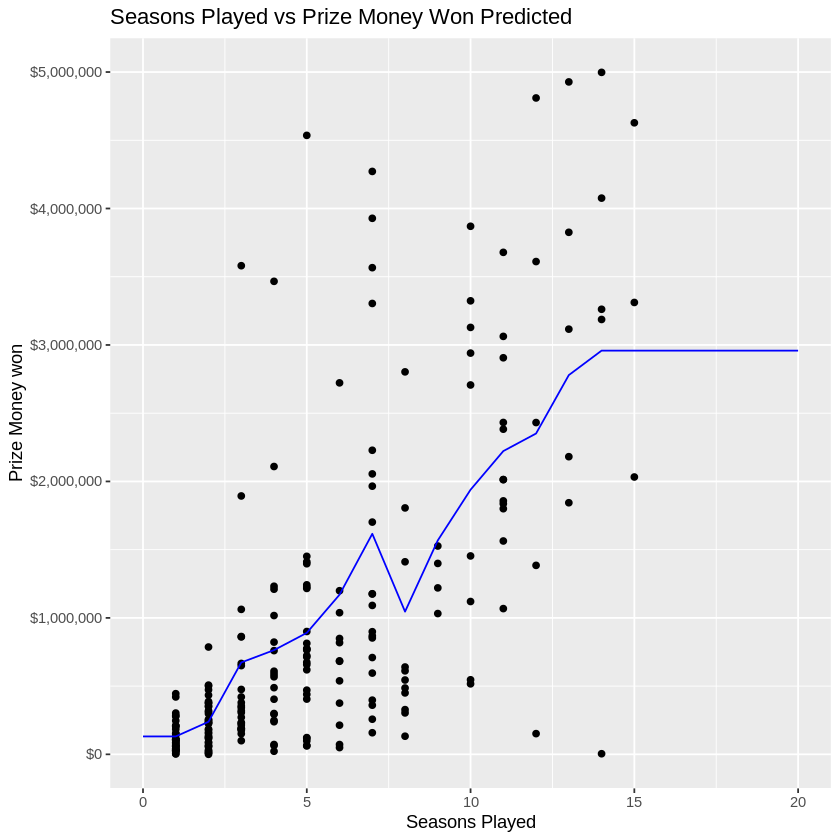

In [17]:
#make visualization of prediction
final_plot

Figure 5. Visualization of relationship between seasons played and prize money won predicted

The visualization made above is to show the trained model working on a tibble made to predict values for seasons played made in a tibble. The graph above plateus after 15 seasons played. This is because in the table shown above the graph, there aren't any players in the data set that have played more than 15 seasons. This is the reason for the graph plateauing since it has no more data to make predictions off of.

**Discussion**

In our analysis, we were able to find a strong correlation between Age and Seasons Played as well as Seasons Played and Prize Money using ggpairs. It’s evident to see that as age increases so do the number of seasons played and with more seasons played the more money is earned. Using the testing data, we then used k-regression analysis on Seasons Played and Prize Money in order to predict how the increasing seasons played affect how much money a tennis player can win. We picked seasons versus money because the correlation number was higher than for age of tennis player and seasons played. The plot for the regression shows that there’s a steady increase of winnings as the number of seasons played goes up, however, there are some outliers that are present such as a player playing ~14 seasons whilst winning nothing. Regardless, we can say that there is a positive correlation between the number of seasons and prize money earned.


We expected this trend to occur because as the seasons increase, so does the experience tennis players gain and as a result, their earnings go up. The years of experience add to the winnings because higher-ranked competitions offer a higher reward. “Men's competitions on the USTA futures pro circuit, aimed at top juniors and college players, offer \\$15,000 - \\$25,000 in prize money; for experienced pro players, the equivalent figure is \\$75,000 - \\$125,000. For qualifiers for the U.S. Open – essentially the top 100 players in the world – they can take home \\$50,000 just for their first event.” (Thompson, 2018).


These findings add to the conclusion that the more you play the more you earn, which is an obvious note to point out because experience is needed to improve your skills. It’s a good fact to remind younger generations of tennis players of, as a lot of people assume that natural talent leads to earnings instead of hard work with trials and tribulations. Novak Djokovic is the number one ranked tennis player by the Association of Tennis Players (ATP) as well as the top earner but he also has played 126 finals. Acknowledging that time is needed to succeed is an impactful lesson for many young professionals to learn.


*The future questions that our analysis could lead to are:*
What other factors contribute to seasons played that can affect total prize money earned?
With the outliers, how do their experience and lack of earnings affect the conclusion that playing more matches earns you more?
What variables can affect a player’s ability to play more matches such as sponsorships or training opportunities given?
How can we remove outliers to make the regression perform better?

**References: (APA)**

* Lange, D. (2021, September 14). ATP: Career prize money earnings of tennis players 2019. Statista. Retrieved December 4, 2021, from https://www.statista.com/statistics/277002/tennis-players-worldwide-by-career-prize-money-earnings/.

* Thompson, J. (2018, September 24). The average salary of professional tennis players. Work. Retrieved December 4, 2021, from https://work.chron.com/average-salary-professional-tennis-players-6052.html.

* Wikimedia Foundation. (2021, December 4). Novak Djokovic career statistics. Wikipedia. Retrieved December 4, 2021, from https://en.wikipedia.org/wiki/Novak_Djokovic_career_statistics.


* Ultimate tennis statistics. Ultimate Tennis Statistics. (2021, June 12). Retrieved Decemeber 7, 2021, from https://www.ultimatetennisstatistics.com/. 